In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_SI = pd.read_csv("/content/drive/MyDrive/NYC Building Data/SI.csv")

In [3]:
data_SI.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea',
       'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
       'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL',
       'CondoNo', 'Tract2010', 'XCoord', 'YCoo

In [4]:
data_SI = data_SI[['ZipCode','Address','BldgClass','LandUse',
                   'OwnerType','OwnerName','LotArea','BldgArea',
                   'ComArea','ResArea','OfficeArea', 'RetailArea', 'GarageArea', 
                   'StrgeArea','FactryArea', 'OtherArea','NumFloors', 'UnitsRes','UnitsTotal','YearBuilt',
                   'YearAlter1', 'YearAlter2','BuiltFAR','CommFAR','XCoord', 'YCoord']]
data_SI.head(5)

,ZipCode,Address,BldgClass,LandUse,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,CommFAR,XCoord,YCoord
0,10301.0,139 BAY STREET,E9,6.0,NaN,139 BAY POINTE PROPER,5716,18965,18965,0,0,6965,0,12000,0,0,4.0,0,1,1884,2000,0,3.32,3.4,963297.0,171951.0
1,10301.0,BAY STREET,V1,11.0,NaN,139 BAY POINTE PROPER,780,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.00,3.4,NaN,NaN
2,10301.0,BAY STREET,V1,11.0,NaN,139 BAY POINTE PROPER,520,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.00,3.4,NaN,NaN
3,10301.0,BAY STREET,V1,11.0,NaN,139 BAY STREET REALTY,278,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.00,3.4,NaN,NaN
4,10301.0,BAY STREET,V1,11.0,P,K MANDEL,6302,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.00,3.4,NaN,NaN


In [5]:
# Check percentage of null data
(data_SI.isnull().sum()/len(data_SI)*100)

ZipCode        1.570360
Address        0.062879
BldgClass      0.058042
LandUse        0.244260
OwnerType     91.570199
OwnerName      0.706178
LotArea        0.000000
BldgArea       0.000000
ComArea        0.000000
ResArea        0.000000
OfficeArea     0.000000
RetailArea     0.000000
GarageArea     0.000000
StrgeArea      0.000000
FactryArea     0.000000
OtherArea      0.000000
NumFloors      0.000000
UnitsRes       0.000000
UnitsTotal     0.000000
YearBuilt      0.000000
YearAlter1     0.000000
YearAlter2     0.000000
BuiltFAR       0.000000
CommFAR        0.000000
XCoord         6.806236
YCoord         6.806236
dtype: float64

In [6]:
data_SI["OwnerType"].unique()

array([nan, 'P', 'C', 'X', 'O', 'M'], dtype=object)

    - C City Ownership
    - M Mixed City & Private Ownership
    - O Other – Public Authority, State or Federal Ownership
    - P Private Ownership – Either the tax lot has started an “in rem action or it was once city owned.
    - X Mixed (Excludes property with a C, M, O, or P ownership code). 
    Fully tax exempt property that could be owned by the city, state, or federal government; a public authority; or a private institution
    - blank Unknown (Usually Private Ownership)

In [7]:
# Rename NULL in OwnerType as UNK indicates an unknown ownership, we don't drop NULL here because it is not a mistake
data_SI["OwnerType"] = data_SI["OwnerType"].fillna("UNK").astype('category')
data_SI["OwnerType"] = data_SI["OwnerType"].cat.reorder_categories(['P', 'C', 'X', 'O', 'M', 'UNK'])

In [8]:
# Because the other NULL value is only ~1%, we decide to drop it for now
data_SI.dropna(inplace=True)

In [9]:
# Drop value(s) with coordinates 0
data_SI = data_SI[data_SI['XCoord'] != 0]

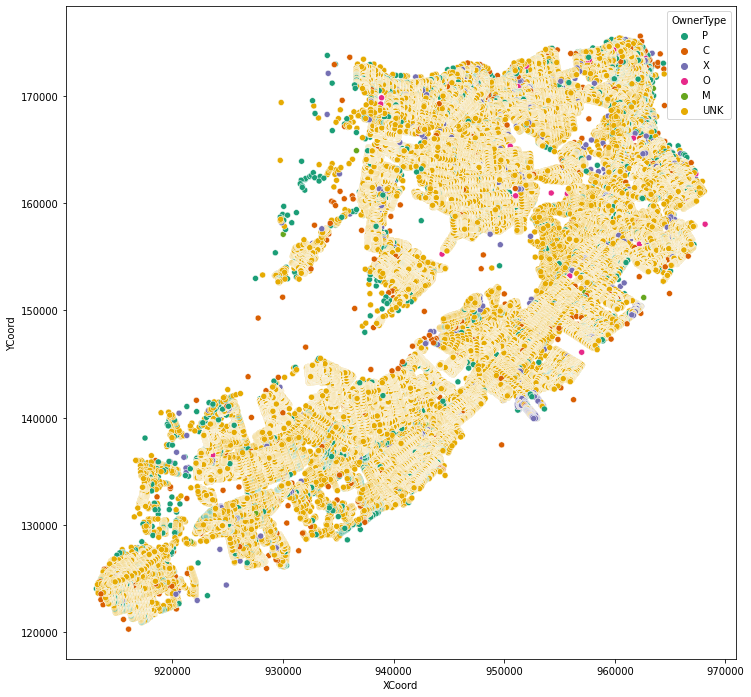

In [10]:
# Distribution of property by OwnerType
plt.figure(figsize=(12,12))
sns.scatterplot(x='XCoord', y = 'YCoord', data=data_SI, hue='OwnerType', palette='Dark2');

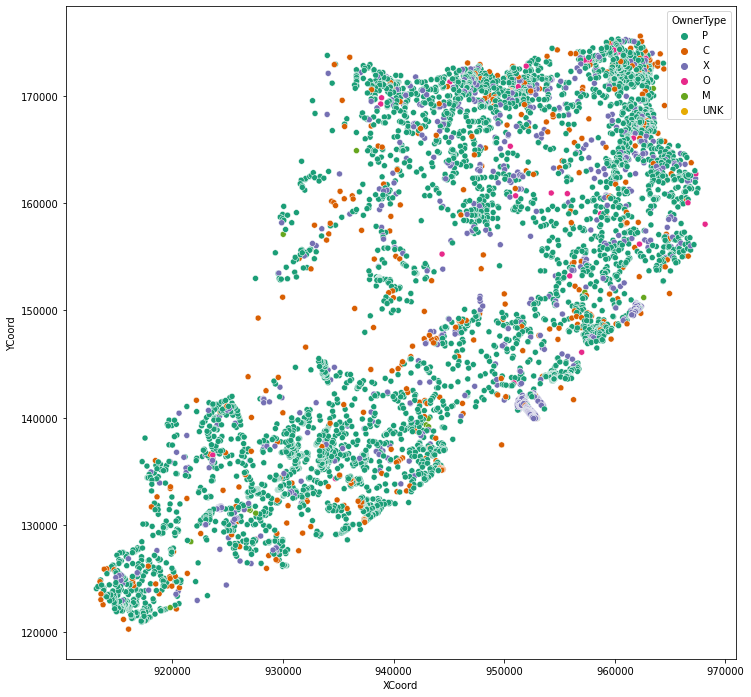

In [11]:
# Distribution of property by OwnerType (UNK excluded)
plt.figure(figsize=(12,12))
sns.scatterplot(x='XCoord', y = 'YCoord', data=data_SI[data_SI['OwnerType'] != 'UNK'], hue='OwnerType', palette='Dark2');

    - 01 One &Two Family Buildings
    - 02 Multi-Family Walk-Up Buildings
    - 03 Multi-Family Elevator Buildings
    - 04 Mixed Residential & Commercial Buildings
    - 05 Commercial & Office Buildings
    - 06 Industrial & Manufacturing
    - 07 Transportation & Utility
    - 08 Public Facilities & Institutions
    - 09 Open Space & Outdoor Recreation
    - 10 Parking Facilities
    - 11 Vacant Land

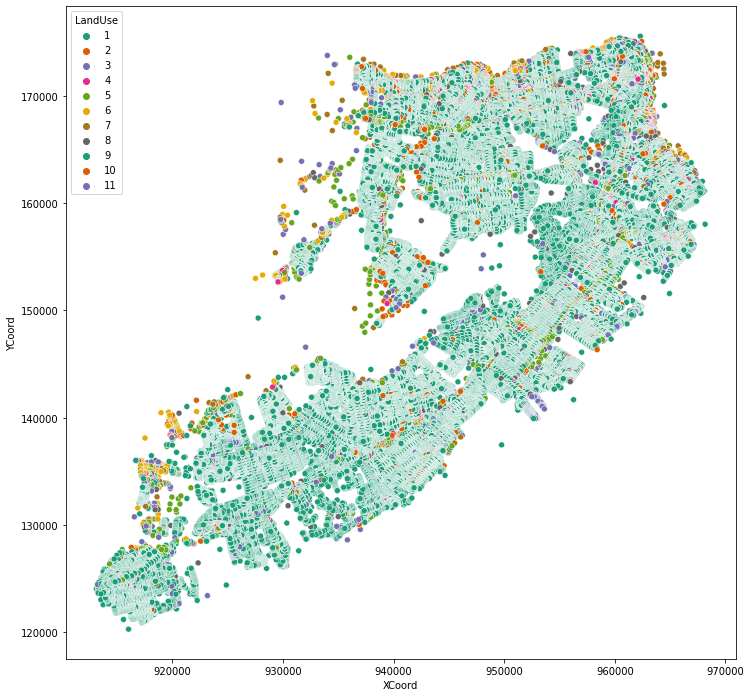

In [12]:
# Distribution of property by LandUse
plt.figure(figsize=(12,12))
data_SI['LandUse'] = data_SI['LandUse'].astype('int').astype('category')
sns.scatterplot(x='XCoord', y = 'YCoord', data=data_SI, hue='LandUse', palette='Dark2');

**Investigate YearBuilt**

In [13]:
# Check how many building with unknown YearBuilt
sum(data_SI['YearBuilt'] == 0)/len(data_SI['YearBuilt'])*100

1.87796285826121

In [14]:
# Because it is only about 1.9%, I think we can remove that observation for now
data_SI_nonZero = data_SI[data_SI['YearBuilt'] != 0]
# Create Age variable by substracting current year with YearBuilt
data_SI_nonZero['Age'] = 2021 - data_SI_nonZero['YearBuilt']

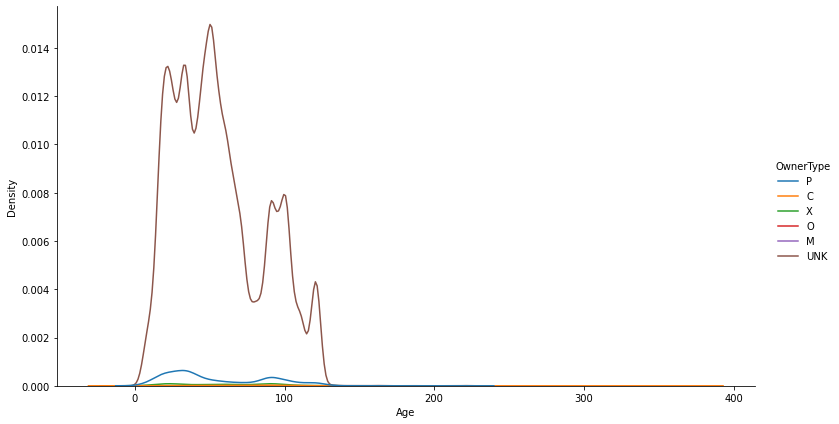

In [15]:
sns.displot(data=data_SI_nonZero, x='Age', hue='OwnerType', kind='kde', height=6, aspect=1.8);

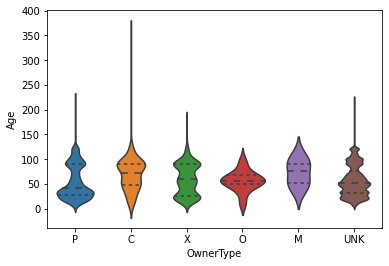

In [16]:
sns.violinplot(x='OwnerType', y='Age', data=data_SI_nonZero, inner="quartile")

In [17]:
data_SI_nonZero.head()

,ZipCode,Address,BldgClass,LandUse,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,CommFAR,XCoord,YCoord,Age
0,10301.0,139 BAY STREET,E9,6,UNK,139 BAY POINTE PROPER,5716,18965,18965,0,0,6965,0,12000,0,0,4.0,0,1,1884,2000,0,3.32,3.4,963297.0,171951.0,137
6,10301.0,65 BAY STREET,O7,5,P,57 BAY STREET ASSOCIA,4600,10600,10600,0,9400,0,1200,0,0,0,3.0,0,1,1923,1991,0,2.30,3.4,963320.0,172669.0,98
7,10301.0,45 BAY STREET,Z3,8,P,UNITED STATES POSTAL,14200,34800,34800,0,34800,0,0,0,0,0,2.0,0,1,1932,0,0,2.45,3.4,963387.0,172845.0,89
8,10301.0,5 BAY STREET,Y7,7,C,NYC DSBS,334565,34941,34941,0,0,0,0,0,34941,0,4.0,0,1,1931,0,0,0.10,3.4,963621.0,172927.0,90
9,10301.0,150 BAY STREET,Y7,7,C,NYC DSBS,121810,22326,22326,0,0,0,0,0,22326,0,3.0,0,1,1931,0,0,0.18,3.4,963871.0,172762.0,90


**How many building was altered since it was built?**

In [18]:
# Only use the latest YearAlter
# Note: This code a bit inefficient, should be another way that could process faster
tmp = []
for i in range(0,len(data_SI_nonZero)):
  YearAlter1 = data_SI_nonZero.iloc[i]['YearAlter1']
  YearAlter2 = data_SI_nonZero.iloc[i]['YearAlter2']
  if YearAlter2 == 0:
    tmp.append(YearAlter1)
  else:
    tmp.append(YearAlter2)

In [19]:
data_SI_nonZero['YearAlter'] = tmp

In [20]:
# Only 5.4% is altered since it was built!
sum(data_SI_nonZero['YearAlter'] != 0)/len(data_SI_nonZero['YearAlter'])*100

5.385351842987076

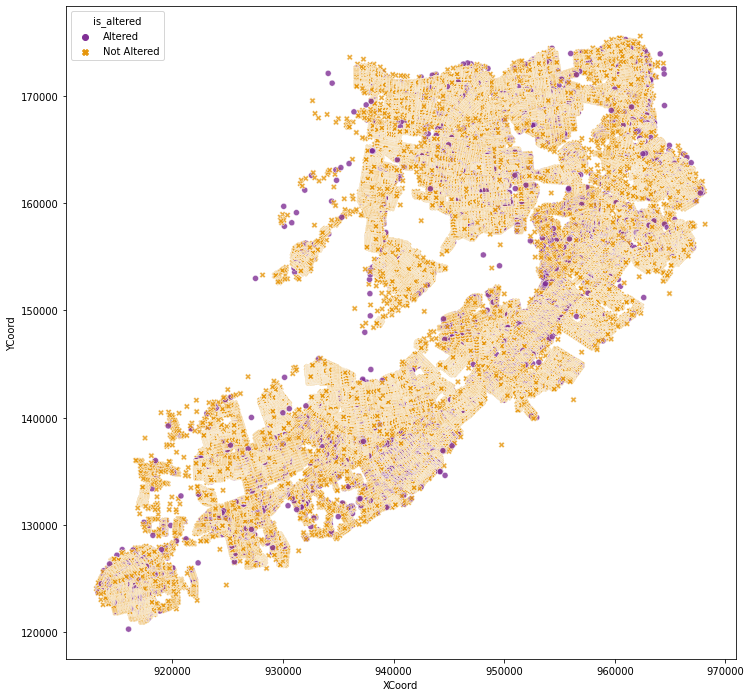

In [21]:
# Distribution of property that already altered
plt.figure(figsize=(12,12))
data_SI_nonZero['is_altered'] = np.where(data_SI_nonZero['YearAlter']== 0, "Not Altered", "Altered")
sns.scatterplot(x='XCoord', y = 'YCoord', data=data_SI_nonZero, hue='is_altered', style='is_altered', palette='CMRmap',alpha=0.8);

In [22]:
data_SI_nonZero['ZipCode'] = data_SI_nonZero['ZipCode'].astype('int').astype('category')
pd.pivot_table(data_SI_nonZero, values=['Age'], 
                     index=['ZipCode'], aggfunc=[np.mean, np.median, np.std]).transpose()

,ZipCode,10301,10302,10303,10304,10305,10306,10307,10308,10309,10310,10312,10314
mean,Age,77.355167,82.124103,56.436430,62.893035,55.850171,55.782222,51.833555,52.715763,37.260779,80.411642,43.512641,53.337877
median,Age,86.000000,91.000000,46.000000,61.000000,51.000000,56.000000,33.000000,51.000000,30.000000,91.000000,43.000000,51.000000
std,Age,31.532247,30.692130,35.580221,34.877884,32.189241,25.571042,36.650537,22.543352,24.390165,31.850151,18.817487,23.452061


**Now we will investigate distribution of LandUse and OwnerType with other variables**

In [23]:
pd.pivot_table(data_SI, values=['LotArea','BldgArea','ComArea','ResArea','OfficeArea','RetailArea','GarageArea','StrgeArea','FactryArea', 'OtherArea'], 
                     index=['LandUse'], aggfunc=[np.mean, np.median])

mean                             ...  median                     
              BldgArea       ComArea   FactryArea  ... ResArea RetailArea StrgeArea
LandUse                                            ...                             
1          1740.824038      0.046718     0.000000  ...    1500          0         0
2          9315.188438     42.072262     0.000000  ...    2904          0         0
3        156319.289157    851.108434     0.000000  ...   98700          0         0
4          4113.955276   1538.189378     3.535989  ...    1550        959         0
5          9280.565690   8935.172495    80.281191  ...       0       1320         0
6         15330.803132  15260.413870  5491.718121  ...       0          0       920
7          9365.234513   9334.300885   253.393805  ...       0          0         0
8         34263.609865  33749.164425    73.312407  ...       0          0         0
9          8062.802752   7886.788991     0.000000  ...       0          0         0
10         2368.290718   2269.292469    13.367776  ...       0          0         0
11            0.000000      0.000000     0.000000  ...       0          0         0

[11 rows x 20 columns]

In [24]:
pd.pivot_table(data_SI, values=['LotArea','BldgArea','ComArea','ResArea','OfficeArea','RetailArea','GarageArea','StrgeArea','FactryArea', 'OtherArea'], 
                     index=['OwnerType'], aggfunc=[np.mean, np.median])

mean                            ...  median                     
                BldgArea       ComArea  FactryArea  ... ResArea RetailArea StrgeArea
OwnerType                                           ...                             
P            6498.058664   3530.699910  326.568818  ...    1500          0         0
C           34667.424084  33839.913613  154.625654  ...       0          0         0
X            8859.628910   6569.295577   68.118662  ...       0          0         0
O          149490.875000  22454.812500    0.000000  ...     672          0         0
M           39669.538462  39076.461538    0.000000  ...       0          0         0
UNK          2002.836672    182.198784   10.754019  ...    1476          0         0

[6 rows x 20 columns]

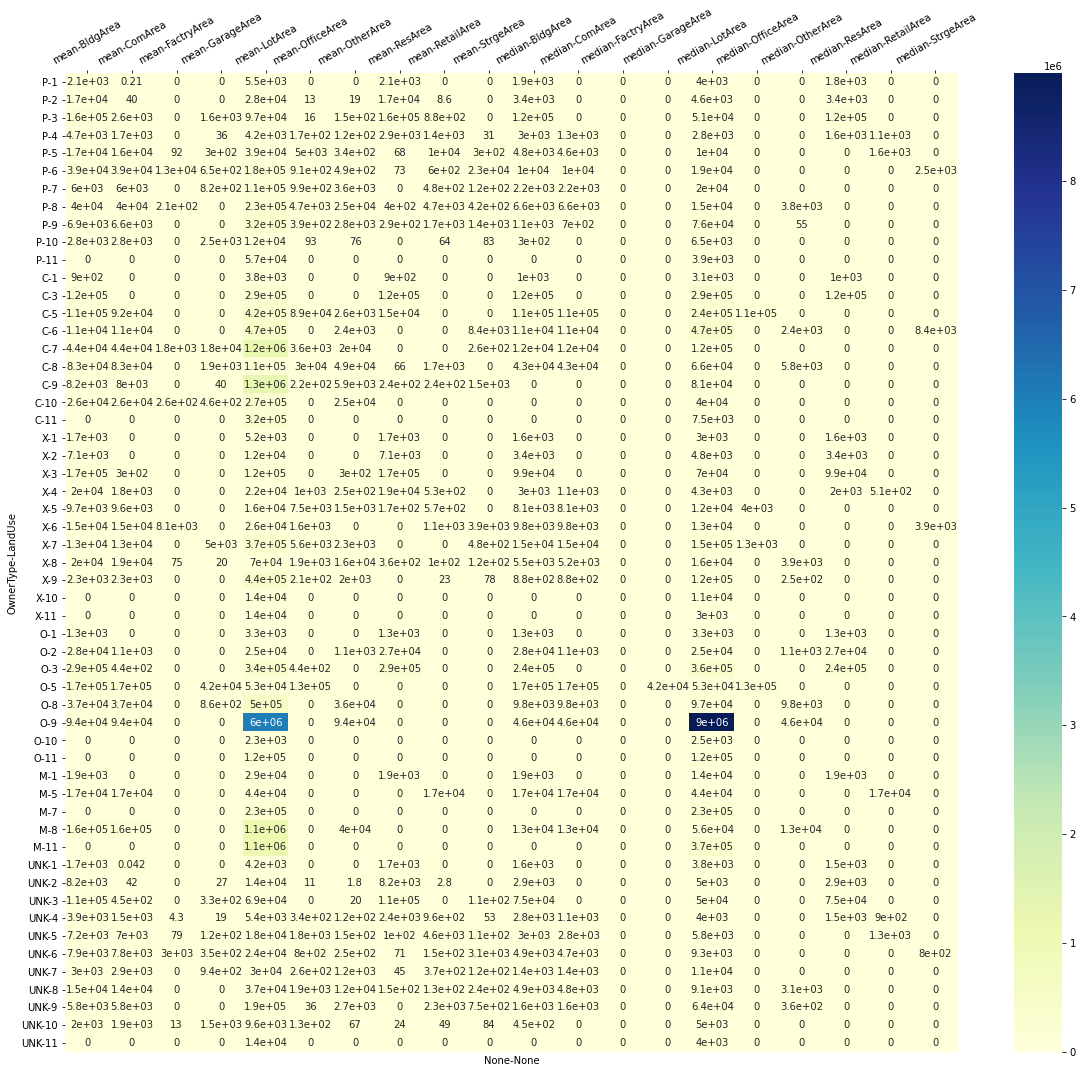

In [25]:
tab = pd.pivot_table(data_SI, values=['LotArea','BldgArea','ComArea','ResArea','OfficeArea','RetailArea','GarageArea','StrgeArea','FactryArea', 'OtherArea'], 
                     index=['OwnerType','LandUse'], aggfunc=[np.mean, np.median])
plt.figure(figsize=(20,18))
ax = sns.heatmap(tab, annot=True, cmap="YlGnBu");
ax.xaxis.tick_top()
plt.xticks(rotation=30);

**Save Cleaned Version**

  - Renamed NAN in OwnerType as UNK
  - Drop NULL values for the rest of variables (only ~1%)

In [26]:
data_SI.to_csv("data_SI_cleaned.csv", index=False)